In [1]:
# Movie Rating prediction project by Gaurav Vashist.

#import the libraries.

import pandas as pd
import numpy as np
import random as rnd


In [17]:

# Read the CSV file into a DataFrame with a different separator
df = pd.read_csv("D:/GAURAV NOTES/notes 1965/codsoft/movie rating/IMDb Movies India.csv", sep=",", encoding='ISO-8859-1')
df.dropna(inplace=True)
df.head()





,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [19]:
# Check the shape of the DataFrame
print(df.shape)


(5659, 10)


In [20]:
df.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [22]:
# Data filtering and Preprocessing.
attribute = df.columns
print(attribute)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [24]:
df.isnull().sum()
# as we have already dropped the null values in the initial stage and it proved our result correct.

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [26]:
shape = df.shape
print(f'Number of rows: {shape[0]}, Number of columns: {shape[1]}')


Number of rows: 5659, Number of columns: 10


In [29]:
unique_genres = df['Genre'].unique()
print('Unique Genres:', unique_genres)


Unique Genres: ['Drama' 'Comedy, Romance' 'Comedy, Drama, Musical' 'Drama, Romance, War'
 'Horror, Mystery, Thriller' 'Action, Crime, Thriller' 'Horror'
 'Horror, Romance, Thriller' 'Comedy, Drama, Romance' 'Comedy, Drama'
 'Crime, Drama, Mystery' 'Horror, Thriller' 'Comedy, Horror'
 'Drama, Horror, Mystery' 'Action, Thriller' 'Action'
 'Horror, Mystery, Romance' 'Horror, Mystery' 'Drama, Horror, Romance'
 'Action, Drama, History' 'Action, Drama, War' 'Thriller' 'Comedy'
 'Adventure, Horror, Mystery' 'Action, Sci-Fi' 'Crime, Mystery, Thriller'
 'Drama, History' 'Sport' 'Biography, Drama, History' 'Horror, Romance'
 'Crime, Drama' 'Adventure, Drama' 'Comedy, Mystery, Thriller'
 'Drama, Romance' 'Crime, Thriller' 'Horror, Sci-Fi, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Family, Musical' 'Action, Comedy'
 'Action, Adventure, Fantasy' 'Documentary' 'Drama, Horror, Musical'
 'Action, Biography, Drama' 'Action, Fantasy, Mystery'
 'Adventure, Drama, Mystery' 'Mystery, Thriller' 'Comedy, 

In [31]:
rating_dist = df['Rating'].value_counts()
print('Rating Distribution:\n', rating_dist)


Rating Distribution:
 6.8     200
6.5     192
6.2     190
6.6     163
7.1     163
       ... 
2.0       2
9.7       1
10.0      1
1.4       1
1.1       1
Name: Rating, Length: 83, dtype: int64


In [32]:
df.drop_duplicates(inplace= True)

In [38]:
attributes = ['Name', 'Year', 'Duration', 'Votes', 'Rating']
df.dropna(subset=attributes, inplace=True)
missing_val = df.isna().sum()



In [41]:
movie_name_rating = df[['Name','Rating']]
print(movie_name_rating.head())

                                 Name  Rating
1  #Gadhvi (He thought he was Gandhi)     7.0
3                             #Yaaram     4.4
5                ...Aur Pyaar Ho Gaya     4.7
6                           ...Yahaan     7.4
8                  ?: A Question Mark     5.6


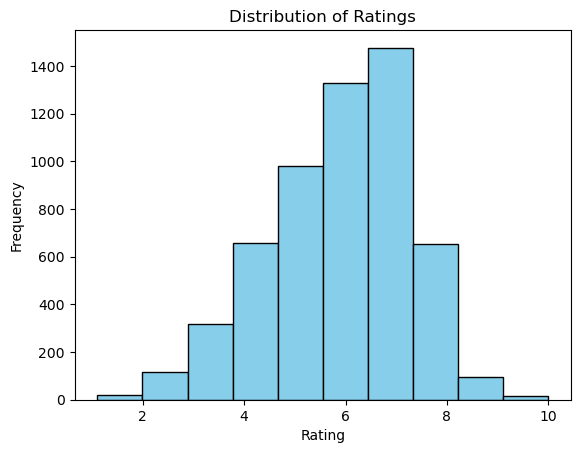

In [42]:
import matplotlib.pyplot as plt

# Assuming 'Rating' is a numeric column
plt.hist(df['Rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


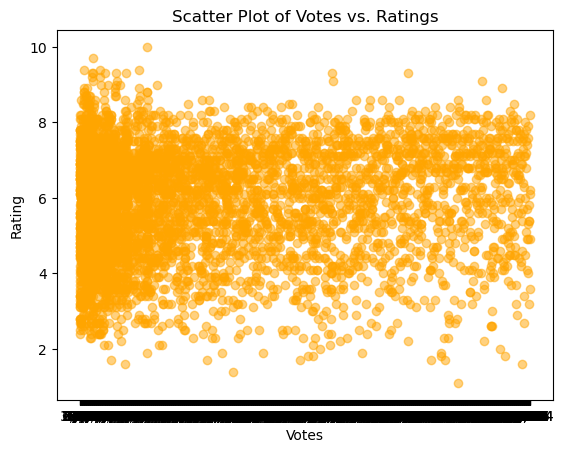

In [47]:
import matplotlib.pyplot as plt

# Assuming 'Votes' and 'Rating' are numeric columns
plt.scatter(df['Votes'], df['Rating'], alpha=0.5, color='orange')
plt.title('Scatter Plot of Votes vs. Ratings')
plt.xlabel('Votes')
plt.ylabel('Rating')

plt.show()



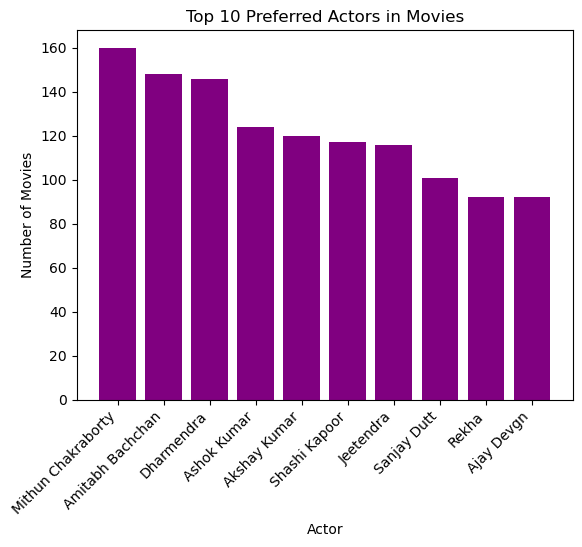

In [48]:
import matplotlib.pyplot as plt

# Concatenate 'Actor 1', 'Actor 2', and 'Actor 3' columns
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']], ignore_index=True)

# Get the top 10 preferred actors based on the number of movies
top_actors = actors.value_counts().head(10)

# Plot a bar graph
plt.bar(top_actors.index, top_actors.values, color='purple')
plt.title('Top 10 Preferred Actors in Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [56]:
import pandas as pd

# Assuming 'Votes' is a numeric column
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')  # Convert 'Votes' to numeric, handling errors

# Sort values based on 'Votes' in descending order
df.sort_values(by='Votes', ascending=False, inplace=True)

# Calculate the vote count percentile
df['VotePercentile'] = df['Votes'].rank(pct=True)

# Sort the rest of the DataFrame based on the percentile
rest_of_df = df.sort_values(by='VotePercentile')

# Display the resulting DataFrame
print(rest_of_df)


                           Name    Year Duration                      Genre  \
8288        Lorni - The Flaneur  (2019)  107 min             Crime, Mystery   
6457               Jai Mahakali  (1951)  162 min                    Fantasy   
1469          B for Bundelkhand  (2017)  117 min                      Drama   
6284            Jaan Lada Denge  (1990)  137 min                     Action   
13759                 Tangewali  (1955)  120 min              Drama, Family   
...                         ...     ...      ...                        ...   
15437                     Ziddi  (1997)  170 min              Action, Drama   
15440            Zila Ghaziabad  (2013)  142 min    Action, Crime, Thriller   
15447                     Zinda  (2006)  116 min     Action, Drama, Mystery   
15476  Zindagi Na Milegi Dobara  (2011)  155 min              Comedy, Drama   
15494                  Zubeidaa  (2001)  153 min  Biography, Drama, History   

       Rating  Votes            Director         Ac

In [58]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,VotePercentile
12569,Satyam Shivam Sundaram: Love Sublime,(1978),172 min,"Drama, Romance",7.1,999.0,Raj Kapoor,Shashi Kapoor,Zeenat Aman,Kanhaiyalal Chaturvedi,1.000000
5663,Hera Pheri,(1976),164 min,"Action, Comedy, Crime",6.8,998.0,Prakash Mehra,Saira Banu,Vinod Khanna,Amitabh Bachchan,0.999767
7930,Kurukshetra,(2000),129 min,"Action, Crime, Drama",6.0,996.0,Mahesh Manjrekar,Mukesh Rishi,Sanjay Dutt,Mahima Chaudhry,0.999534
3961,Dishkiyaoon,(2014),119 min,"Action, Thriller",5.2,986.0,Sanamjit Singh Talwar,Harman Baweja,Harsh Chhaya,Sunny Deol,0.999301
7083,Kadvi Hawa,(2017),95 min,Drama,8.1,985.0,Nila Madhab Panda,Nilamadhab Panda,Sanjay Mishra,Ranvir Shorey,0.998951


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'Votes', 'Duration', 'Year' are numeric columns, and 'Rating' is the target variable
selected_features = ['Votes', 'Duration', 'Year']
target_variable = 'Rating'

# Create a copy of the DataFrame
data = df[selected_features + [target_variable]].copy()

# Handle any missing values
data.dropna(inplace=True)

# Convert 'Duration' to numeric (remove 'min' suffix)
data['Duration'] = data['Duration'].str.rstrip(' min').astype('float')

# Clean 'Year' column (remove non-numeric characters)
data['Year'] = data['Year'].str.extract('(\d+)').astype('float')

# Split the data into features (X) and target variable (y)
X = data[selected_features]
y = data[target_variable]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Optionally, you can print the model coefficients and intercept
print('Model Coefficients:', model.coef_)
print('Model Intercept:', model.intercept_)




Mean Squared Error: 1.6126697548861497
Model Coefficients: [ 0.08491233 -0.25435353 -0.48157526]
Model Intercept: 5.794538290511269


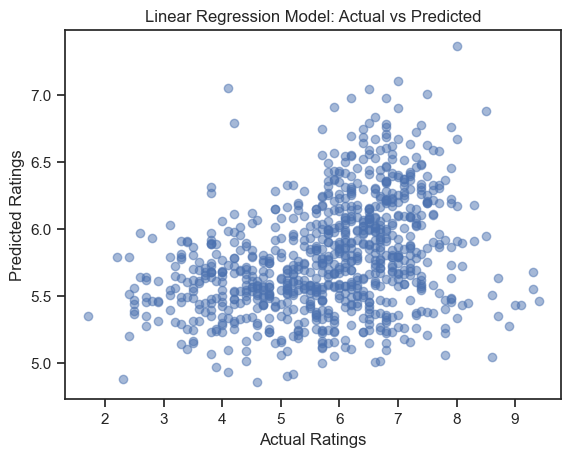

In [63]:
import matplotlib.pyplot as plt

# Plotting the predicted values against the actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Linear Regression Model: Actual vs Predicted')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()


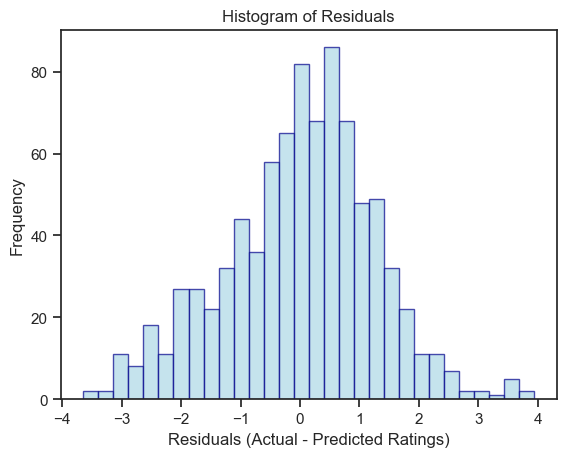

In [66]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plotting the histogram of residuals with different color combinations
plt.hist(residuals, bins=30, color='lightblue', edgecolor='darkblue', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals (Actual - Predicted Ratings)')
plt.ylabel('Frequency')
plt.show()

